# Business Understanding

### Background: 
My company is planning to diversify its porfolio by extending to different markets. More specifically, my company is looking to invest in airplanes in order for their expansion to different markets to be successful.

### Business goals: 

This project is focusing on determining the risks of different aircrafts. Specifically, this project has the goal of identifying which aircrafts pose the least amount of potential risk. This information will be used in order to provide three recommendations to my company regarding the safest aircrafts to purchase. 

### Business success criteria: 

The success criteria for this project will be to provide three recommendations about the safest aircrafts that my company should invest in. For this project, the term "safest" refers to types of aircrafts with the least amount of crashes, the least number of casualties, and lowest casualty rate.

# Data Understanding

The National Transportation Safety Board (NTSB) collects data on aviation accidents and incidents that occur in the United States (which include its territories) as well as international waters. This dataset includes 31 features and 88,889 observations or entries. 

Each entry in the dataset represents an aircraft involved in an accident (or incident). For each aircraft there is a unique ID associated with the specific accident (or incident) the aircraft was involved in. Additional information is included about each entry, such as the accident (or incident) date, location, and number of injuries, as well as characteristics about the aircraft, such as the make, model, and number of engines.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('AviationData.csv', encoding = 'latin-1')

/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.shape

(88889, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Preparation

To prepare the data for analysis I began by examining the data type and number of NaN values in each column. 

* In the `Aircraft.Category` column there were categories besides airplanes. I removed all rows that included non-airplane aircraft, since the company is specifically looking to invest in airplanes. With `Aircraft.Category` only containing airplanes, I removed this column to avoid redundancy. 

* The `Amateur.Built` column provided information about whether each aircraft was built by an amatuer or not. For safety purposes, I decided that only professionally-built airplanes should be included in this analysis, so I removed all rows including amateur-built airplanes. Then, to avoid redundancy, I removed the `Amateur.Built` column since it then only included professionally built airplanes 

* From this point, I examined the total number of NaN values in each column using `df.isna().sum()`. Using this information, I removed the following columns because they contained around 50% or more NaN values: `Latitude`, `Longitude`, `FAR.Description`, `Air.Carrier`, and `Schedule`

In [7]:
#function that displays the dataframe .info() and .isna().sum()
def display_df_information(dataframe):
    print(dataframe.info())
    print()
    print('--- Number of NaNs per Column ---')
    print(dataframe.isna().sum())
    print()

In [8]:
display_df_information(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [9]:
#function uses a for loop to print the column name and .value_counts() for column names in a list
def multiple_value_counts(dataframe,list_of_columns):
    for col in list_of_columns:
        print("----" + col + "----")
        print()
        print(dataframe[col].value_counts())
        print()
        print("There are " + str(dataframe[col].nunique()) + ' unique entries in ' + col)
        print()

In [10]:
#Prints the .value_counts() for all the columns of the dataframe
multiple_value_counts(df, df.columns)

----Event.Id----

20001214X45071    3
20001212X19172    3
20001214X40252    2
20001208X09195    2
20050817X01269    2
                 ..
20001212X22889    1
20001212X21615    1
20001211X15786    1
20001213X26628    1
20001207X04252    1
Name: Event.Id, Length: 87951, dtype: int64

There are 87951 unique entries in Event.Id

----Investigation.Type----

Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

There are 2 unique entries in Investigation.Type

----Accident.Number----

CEN22FA424    2
WPR22FA309    2
ERA22LA364    2
DCA22WA158    2
CEN22LA346    2
             ..
CHI96LA126    1
BFO84FU002    1
DEN08LA024    1
ATL85LA145    1
DEN85LA018    1
Name: Accident.Number, Length: 88863, dtype: int64

There are 88863 unique entries in Accident.Number

----Event.Date----

1984-06-30    25
2000-07-08    25
1982-05-16    25
1983-08-05    24
1986-05-17    24
              ..
2004-03-30     1
2018-01-06     1
2020-12-20     1
2012-01-09     1
1948-10-24     1
Name: Ev

Probable Cause                                                                                                                                                                                                                                                      61754
Foreign                                                                                                                                                                                                                                                              1999
<br /><br />                                                                                                                                                                                                                                                          167
Factual                                                                                                                                                                                                   

In [11]:
#function that examines features with more closely 
#by printing the first ten entries and data types for each of these features

def examine_features(dataframe, list_of_features):
    if type(list_of_features) == list:
        for feature in list_of_features:
            print("---" + feature + ' First 10 entries' + '---')
            print(dataframe[feature].head(10))
            print()
            print(print("---" + feature + ' First 10 data types' + '---'))
            for entry in dataframe[feature][:10]:
                print(type(entry))
            print('\n')
    else:
        print("---" + list_of_features + ' First 10 entries' + '---')
        print(dataframe[list_of_features].head(10))
        print()
        print(print("---" + list_of_features + ' First 10 data types' + '---'))
        for entry in dataframe[list_of_features][:10]:
            print(type(entry))
        print('\n')

In [12]:
cols_over_500_nan = list(df.columns[df.isna().sum() > 500])

In [13]:
examine_features(df, cols_over_500_nan)

---Latitude First 10 entries---
0        NaN
1        NaN
2    36.9222
3        NaN
4        NaN
5    42.4453
6        NaN
7        NaN
8        NaN
9        NaN
Name: Latitude, dtype: object

---Latitude First 10 data types---
None
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


---Longitude First 10 entries---
0        NaN
1        NaN
2   -81.8781
3        NaN
4        NaN
5   -70.7583
6        NaN
7        NaN
8        NaN
9        NaN
Name: Longitude, dtype: object

---Longitude First 10 data types---
None
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


---Airport.Code First 10 entries---
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    N58
9    JAX
Name: Airport.Code, dtype: object

---Airport.Code First 10 data types---
None
<c

In [14]:
# To make for easier handling of my data, I remove the following columns as they either have a 
# large number of missing values or they do not provide information that is beneficial for my analysis

cols_to_drop = ['Longitude', 'Latitude', 'FAR.Description', 'Schedule', 'Air.carrier', 'Airport.Code',
                'Airport.Name', 'Publication.Date', 'Report.Status', 'Registration.Number',
                'Investigation.Type', 'Purpose.of.flight']

In [15]:
#Removes columns in cols_to_drop
df_clean = df.drop(cols_to_drop, axis = 1)
display_df_information(df_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Injury.Severity         87889 non-null  object 
 6   Aircraft.damage         85695 non-null  object 
 7   Aircraft.Category       32287 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Amateur.Built           88787 non-null  object 
 11  Number.of.Engines       82805 non-null  float64
 12  Engine.Type             81812 non-null  object 
 13  Total.Fatal.Injuries    77488 non-null  float64
 14  Total.Serious.Injuries  76379 non-null

In [16]:
#Creates a list of non-airplane aircraft categories
non_airplanes = list(df['Aircraft.Category'].value_counts()[1:].index)
non_airplanes

['Helicopter',
 'Glider',
 'Balloon',
 'Gyrocraft',
 'Weight-Shift',
 'Powered Parachute',
 'Ultralight',
 'Unknown',
 'WSFT',
 'Powered-Lift',
 'Blimp',
 'UNK',
 'Rocket',
 'ULTR']

In [17]:
#uses lambda function to filter out any non-airplane labeled aircraft using the non-airplanes list
df_clean = df_clean.apply(lambda row: row[~df_clean['Aircraft.Category'].isin(non_airplanes)])
df_clean['Aircraft.Category'].value_counts()

Airplane    27617
Name: Aircraft.Category, dtype: int64

In [18]:
#Drops the Aircraft.Category column since it only contains airplanes
df_clean = df_clean.drop(['Aircraft.Category'], axis = 1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84219 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                84219 non-null  object 
 1   Accident.Number         84219 non-null  object 
 2   Event.Date              84219 non-null  object 
 3   Location                84169 non-null  object 
 4   Country                 83998 non-null  object 
 5   Injury.Severity         83289 non-null  object 
 6   Aircraft.damage         81201 non-null  object 
 7   Make                    84159 non-null  object 
 8   Model                   84129 non-null  object 
 9   Amateur.Built           84119 non-null  object 
 10  Number.of.Engines       78838 non-null  float64
 11  Engine.Type             78456 non-null  object 
 12  Total.Fatal.Injuries    73364 non-null  float64
 13  Total.Serious.Injuries  72205 non-null  float64
 14  Total.Minor.Injuries    72740 non-null

In [19]:
df_clean['Amateur.Built'].value_counts()

No     76008
Yes     8111
Name: Amateur.Built, dtype: int64

In [20]:
#Creates a new dataframe consisting only of professionally built airplanes
df_clean = df_clean[(df_clean['Amateur.Built'] == 'No')]
df_clean['Amateur.Built'].value_counts()

No    76008
Name: Amateur.Built, dtype: int64

In [21]:
#Drops the Amateur.Built column since now all data in this column is only 'NO'
df_clean = df_clean.drop(['Amateur.Built'], axis = 1)
display_df_information(df_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76008 entries, 0 to 88888
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                76008 non-null  object 
 1   Accident.Number         76008 non-null  object 
 2   Event.Date              76008 non-null  object 
 3   Location                75962 non-null  object 
 4   Country                 75793 non-null  object 
 5   Injury.Severity         75079 non-null  object 
 6   Aircraft.damage         73037 non-null  object 
 7   Make                    75963 non-null  object 
 8   Model                   75941 non-null  object 
 9   Number.of.Engines       70984 non-null  float64
 10  Engine.Type             70611 non-null  object 
 11  Total.Fatal.Injuries    66350 non-null  float64
 12  Total.Serious.Injuries  65376 non-null  float64
 13  Total.Minor.Injuries    65867 non-null  float64
 14  Total.Uninjured         71286 non-null

In [22]:
#For Injury.Severity, group all fatal injuries into the same category named "Fatal" without
#specifying the number of fatalities since the Total.Fatal.Injuries column includes this information

df_clean['Injury.Severity'] = df_clean['Injury.Severity'].map(lambda entry: str(entry).split('(')[0])
df_clean['Injury.Severity'].value_counts()

Non-Fatal      58094
Fatal          14495
Incident        2140
nan              929
Minor            157
Serious          116
Unavailable       77
Name: Injury.Severity, dtype: int64

In [121]:
#Grouping minor injuries into the Non-Fatal category
df_clean['Injury.Severity'].replace({'Minor': 'Non-Fatal'}, inplace = True)
df_clean['Injury.Severity'].replace({'Serious': 'Non-Fatal'}, inplace = True)
df_clean['Injury.Severity'].value_counts()  

Non-Fatal      53530
Fatal          11919
Unavailable       45
Name: Injury.Severity, dtype: int64

In [122]:
#Grouping nan values into the Unavailable category
df_clean['Injury.Severity'].replace({'nan': 'Unavailable'}, inplace = True)
df_clean['Injury.Severity'].value_counts()

Non-Fatal      53530
Fatal          11919
Unavailable       45
Name: Injury.Severity, dtype: int64

In [123]:
#Removes all rows where Injury.Severity is 'Incident'
df_clean = df_clean[df_clean['Injury.Severity'] != 'Incident']
df_clean['Injury.Severity'].value_counts()

Non-Fatal      53530
Fatal          11919
Unavailable       45
Name: Injury.Severity, dtype: int64

In [124]:
df_clean.isna().sum()

Event.Id                     0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Make                         0
Model                        0
Number.of.Engines            0
Engine.Type                  0
Total.Fatal.Injuries      8344
Total.Serious.Injuries    9125
Total.Minor.Injuries      8465
Total.Uninjured           3863
Weather.Condition            0
Broad.phase.of.flight        0
Event.Day                    0
dtype: int64

In [125]:
#Grouping UNK values into the Unknown category
df_clean['Engine.Type'].replace({'UNK': 'Unknown'}, inplace = True)
df_clean['Engine.Type'].value_counts()

Reciprocating      58678
Turbo Prop          2737
Turbo Shaft         2157
Turbo Fan           1012
Unknown              529
Turbo Jet            375
Electric               5
Geared Turbofan        1
Name: Engine.Type, dtype: int64

In [126]:
#Converting all entries in Engine.Type to string data type
df_clean['Engine.Type'] = df_clean['Engine.Type'].astype(str)

In [127]:
examine_features(df_clean, ['Engine.Type'])

---Engine.Type First 10 entries---
0     Reciprocating
1     Reciprocating
2     Reciprocating
3     Reciprocating
5         Turbo Fan
6     Reciprocating
7     Reciprocating
8     Reciprocating
9     Reciprocating
10    Reciprocating
Name: Engine.Type, dtype: object

---Engine.Type First 10 data types---
None
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>




In [128]:
display_df_information(df_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65494 entries, 0 to 88767
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                65494 non-null  object        
 1   Accident.Number         65494 non-null  object        
 2   Event.Date              65494 non-null  datetime64[ns]
 3   Location                65494 non-null  object        
 4   Country                 65494 non-null  object        
 5   Injury.Severity         65494 non-null  object        
 6   Aircraft.damage         65494 non-null  object        
 7   Make                    65494 non-null  object        
 8   Model                   65494 non-null  object        
 9   Number.of.Engines       65494 non-null  float64       
 10  Engine.Type             65494 non-null  object        
 11  Total.Fatal.Injuries    57150 non-null  float64       
 12  Total.Serious.Injuries  56369 non-null  float6

In [129]:
df_clean = df_clean[df_clean['Number.of.Engines'].notna()]
display_df_information(df_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65494 entries, 0 to 88767
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                65494 non-null  object        
 1   Accident.Number         65494 non-null  object        
 2   Event.Date              65494 non-null  datetime64[ns]
 3   Location                65494 non-null  object        
 4   Country                 65494 non-null  object        
 5   Injury.Severity         65494 non-null  object        
 6   Aircraft.damage         65494 non-null  object        
 7   Make                    65494 non-null  object        
 8   Model                   65494 non-null  object        
 9   Number.of.Engines       65494 non-null  float64       
 10  Engine.Type             65494 non-null  object        
 11  Total.Fatal.Injuries    57150 non-null  float64       
 12  Total.Serious.Injuries  56369 non-null  float6

In [130]:
df_clean['Make'][3]

'Rockwell'

In [131]:
df_clean['Make'] = df_clean['Make'].astype(str)

In [132]:
df_clean['Make'] = df_clean['Make'].map(lambda x: x.title())

In [133]:
examine_features(df_clean, list(df_clean.columns))

---Event.Id First 10 entries---
0     20001218X45444
1     20001218X45447
2     20061025X01555
3     20001218X45448
5     20170710X52551
6     20001218X45446
7     20020909X01562
8     20020909X01561
9     20020909X01560
10    20020909X01559
Name: Event.Id, dtype: object

---Event.Id First 10 data types---
None
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


---Accident.Number First 10 entries---
0     SEA87LA080
1     LAX94LA336
2     NYC07LA005
3     LAX96LA321
5     NYC79AA106
6     CHI81LA106
7     SEA82DA022
8     NYC82DA015
9     MIA82DA029
10    FTW82DA034
Name: Accident.Number, dtype: object

---Accident.Number First 10 data types---
None
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


---Event.Date First 10 entries---
0    1948-10-24
1    1962-07-19
2    1974-08-30
3    1977-06-19
5    1979-0

In [134]:
multiple_value_counts(df_clean, list(df_clean.columns))

----Event.Id----

20001214X45071    3
20001212X19172    3
20001211X12561    2
20001213X34415    2
20040812X01202    2
                 ..
20001214X43779    1
20001212X24449    1
20001213X27975    1
20001213X35016    1
20220810105709    1
Name: Event.Id, Length: 64862, dtype: int64

There are 64862 unique entries in Event.Id

----Accident.Number----

ERA22LA119    2
CEN22LA149    2
ERA22LA103    2
CHI89LA099    1
LAX86LA172    1
             ..
FTW00LA258    1
ATL91LA146    1
ATL85LA145    1
DEN08LA024    1
DEN85LA018    1
Name: Accident.Number, Length: 65491, dtype: int64

There are 65491 unique entries in Accident.Number

----Event.Date----

2000-07-08    23
1983-10-01    22
1984-06-30    22
1983-08-05    22
1982-05-16    22
              ..
2021-01-19     1
2020-08-21     1
1983-01-22     1
2008-12-10     1
2018-09-23     1
Name: Event.Date, Length: 13894, dtype: int64

There are 13894 unique entries in Event.Date

----Location----

ANCHORAGE, AK          384
FAIRBANKS, AK          1

In [135]:
df_clean = df_clean.dropna(subset = ['Weather.Condition', 'Aircraft.damage'])
display_df_information(df_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65494 entries, 0 to 88767
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                65494 non-null  object        
 1   Accident.Number         65494 non-null  object        
 2   Event.Date              65494 non-null  datetime64[ns]
 3   Location                65494 non-null  object        
 4   Country                 65494 non-null  object        
 5   Injury.Severity         65494 non-null  object        
 6   Aircraft.damage         65494 non-null  object        
 7   Make                    65494 non-null  object        
 8   Model                   65494 non-null  object        
 9   Number.of.Engines       65494 non-null  float64       
 10  Engine.Type             65494 non-null  object        
 11  Total.Fatal.Injuries    57150 non-null  float64       
 12  Total.Serious.Injuries  56369 non-null  float6

In [136]:
df_clean['Weather.Condition'].replace({'UNK': 'Unknown'}, inplace = True)
df_clean['Weather.Condition'].replace({'Unk': 'Unknown'}, inplace = True)
df_clean['Weather.Condition'].value_counts()

VMC        59787
IMC         5068
Unknown      639
Name: Weather.Condition, dtype: int64

In [137]:
#Removes all rows where Engine.Type is 'nan'
df_clean = df_clean[df_clean['Engine.Type'] != 'nan']
df_clean['Engine.Type'].value_counts()

Reciprocating      58678
Turbo Prop          2737
Turbo Shaft         2157
Turbo Fan           1012
Unknown              529
Turbo Jet            375
Electric               5
Geared Turbofan        1
Name: Engine.Type, dtype: int64

In [138]:
display_df_information(df_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65494 entries, 0 to 88767
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                65494 non-null  object        
 1   Accident.Number         65494 non-null  object        
 2   Event.Date              65494 non-null  datetime64[ns]
 3   Location                65494 non-null  object        
 4   Country                 65494 non-null  object        
 5   Injury.Severity         65494 non-null  object        
 6   Aircraft.damage         65494 non-null  object        
 7   Make                    65494 non-null  object        
 8   Model                   65494 non-null  object        
 9   Number.of.Engines       65494 non-null  float64       
 10  Engine.Type             65494 non-null  object        
 11  Total.Fatal.Injuries    57150 non-null  float64       
 12  Total.Serious.Injuries  56369 non-null  float6

In [139]:
type(df_clean['Event.Date'][2])

pandas._libs.tslibs.timestamps.Timestamp

In [140]:
#Convert event dates from string to pandas datetime datatype
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'])

In [141]:
type(df_clean['Event.Date'][2])

pandas._libs.tslibs.timestamps.Timestamp

In [142]:
#Creating a column for the day of the week for each event
df_clean['Event.Day'] = df_clean['Event.Date'].dt.day_name()

In [143]:
display_df_information(df_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65494 entries, 0 to 88767
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                65494 non-null  object        
 1   Accident.Number         65494 non-null  object        
 2   Event.Date              65494 non-null  datetime64[ns]
 3   Location                65494 non-null  object        
 4   Country                 65494 non-null  object        
 5   Injury.Severity         65494 non-null  object        
 6   Aircraft.damage         65494 non-null  object        
 7   Make                    65494 non-null  object        
 8   Model                   65494 non-null  object        
 9   Number.of.Engines       65494 non-null  float64       
 10  Engine.Type             65494 non-null  object        
 11  Total.Fatal.Injuries    57150 non-null  float64       
 12  Total.Serious.Injuries  56369 non-null  float6

In [144]:
multiple_value_counts(df_clean, list(df_clean.columns))

----Event.Id----

20001214X45071    3
20001212X19172    3
20001211X12561    2
20001213X34415    2
20040812X01202    2
                 ..
20001214X43779    1
20001212X24449    1
20001213X27975    1
20001213X35016    1
20220810105709    1
Name: Event.Id, Length: 64862, dtype: int64

There are 64862 unique entries in Event.Id

----Accident.Number----

ERA22LA119    2
CEN22LA149    2
ERA22LA103    2
CHI89LA099    1
LAX86LA172    1
             ..
FTW00LA258    1
ATL91LA146    1
ATL85LA145    1
DEN08LA024    1
DEN85LA018    1
Name: Accident.Number, Length: 65491, dtype: int64

There are 65491 unique entries in Accident.Number

----Event.Date----

2000-07-08    23
1983-10-01    22
1984-06-30    22
1983-08-05    22
1982-05-16    22
              ..
2021-01-19     1
2020-08-21     1
1983-01-22     1
2008-12-10     1
2018-09-23     1
Name: Event.Date, Length: 13894, dtype: int64

There are 13894 unique entries in Event.Date

----Location----

ANCHORAGE, AK          384
FAIRBANKS, AK          1

In [145]:
list_of_categorical_features_with_nan = ['Broad.phase.of.flight', 'Location', 'Country', 'Model']

In [146]:
#Function that fills multiple columns' NaN values with 'Unknown'
def multiple_fill_nan(dataframe, list_of_cols):
    for col in list_of_cols:
        dataframe[col] = dataframe[col].fillna('Unknown')

In [147]:
multiple_fill_nan(df_clean, list_of_categorical_features_with_nan)
display_df_information(df_clean)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65494 entries, 0 to 88767
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                65494 non-null  object        
 1   Accident.Number         65494 non-null  object        
 2   Event.Date              65494 non-null  datetime64[ns]
 3   Location                65494 non-null  object        
 4   Country                 65494 non-null  object        
 5   Injury.Severity         65494 non-null  object        
 6   Aircraft.damage         65494 non-null  object        
 7   Make                    65494 non-null  object        
 8   Model                   65494 non-null  object        
 9   Number.of.Engines       65494 non-null  float64       
 10  Engine.Type             65494 non-null  object        
 11  Total.Fatal.Injuries    57150 non-null  float64       
 12  Total.Serious.Injuries  56369 non-null  float6

In [254]:
# Cleaned dataframe is saved as a csv
df_clean.to_csv('aircraft_safety_cleaned.csv')

# Exploratory Data Analysis

The following are findings from the analysis below:
* Almost 90% of reported accidents involved aircraft with a Engine Type classified as 'Reciprocating'
* ~98% of reported accidents involved aircraft with either 1 or 2 engines
* Almost one-third of accidents (~31%) occurred during either the 'Landing' or 'Takeoff' phases of the flight
* Based on metrics for lowest fatality rate, least number of deaths, and lowest number of deaths per flight, the safest brands of airplanes include: 
 * Hiller
 * Schweizer
 * Stinson
 * Maule
 * Enstrom
 * Luscombe
 * Aeronca
 * Air Tractor
 * Ayres

In [149]:
df_clean.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,65494.000000,57150.000000,56369.000000,57029.000000,61631.000000
mean,1.131661,0.482415,0.241835,0.337320,2.395158
std,0.387923,3.464409,1.170751,1.404234,15.368581
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,270.000000,137.000000,125.000000,699.000000


In [150]:
fatal_rate = len(df_clean[df_clean['Injury.Severity'] == 'Fatal'])/len(df_clean['Injury.Severity'])
print(f"Fatality rate: {round(fatal_rate*100, 2)}% ")

Fatality rate: 18.2% 


In [214]:
type_of_engines_percent = df_clean['Engine.Type'].value_counts(normalize = True)
type_of_engines_percent

Reciprocating      0.895929
Turbo Prop         0.041790
Turbo Shaft        0.032934
Turbo Fan          0.015452
Unknown            0.008077
Turbo Jet          0.005726
Electric           0.000076
Geared Turbofan    0.000015
Name: Engine.Type, dtype: float64

In [181]:
num_of_engines_percent = df_clean['Number.of.Engines'].value_counts(normalize = True)
num_of_engines_percent

1.0    0.860919
2.0    0.126683
0.0    0.007527
4.0    0.002687
3.0    0.002168
8.0    0.000015
Name: Number.of.Engines, dtype: float64

In [226]:
df_clean.groupby(['Engine.Type','Number.of.Engines']).sum()

Total.Fatal.Injuries  \
Engine.Type     Number.of.Engines                         
Electric        1.0                                 0.0   
                4.0                                 0.0   
                8.0                                 0.0   
Geared Turbofan 2.0                                 0.0   
Reciprocating   0.0                                 1.0   
                1.0                             15735.0   
                2.0                              3922.0   
                3.0                                 0.0   
                4.0                                57.0   
Turbo Fan       1.0                                22.0   
                2.0                              1795.0   
                3.0                               596.0   
                4.0                              1202.0   
Turbo Jet       1.0                                46.0   
                2.0                               381.0   
                3.0                                 1.0   
                4.0                               277.0   
Turbo Prop      1.0                               506.0   
                2.0                              1649.0   
                4.0                               108.0   
Turbo Shaft     1.0                               753.0   
                2.0                               213.0   
                3.0                                 1.0   
Unknown         0.0                               288.0   
                1.0                                 5.0   
                2.0                                12.0   
                4.0                                 0.0   

                                   Total.Serious.Injuries  \
Engine.Type     Number.of.Engines                           
Electric        1.0                                   0.0   
                4.0                                   0.0   
                8.0                                   0.0   
Geared Turbofan 2.0                                   0.0   
Reciprocating   0.0                                   0.0   
                1.0                                9814.0   
                2.0                                1146.0   
                3.0                                   2.0   
                4.0                                  11.0   
Turbo Fan       1.0                                   1.0   
                2.0                                 655.0   
                3.0                                 251.0   
                4.0                                 157.0   
Turbo Jet       1.0                                  18.0   
                2.0                                  95.0   
                3.0                                  11.0   
                4.0                                   5.0   
Turbo Prop      1.0                                 226.0   
                2.0                                 330.0   
                4.0                                   3.0   
Turbo Shaft     1.0                                 638.0   
                2.0                                 110.0   
                3.0                                   0.0   
Unknown         0.0                                 149.0   
                1.0                                   6.0   
                2.0                                   4.0   
                4.0                                   0.0   

                                   Total.Minor.Injuries  Total.Uninjured  
Engine.Type     Number.of.Engines                                         
Electric        1.0                                 0.0              2.0  
                4.0                                 0.0              0.0  
                8.0                                 0.0              0.0  
Geared Turbofan 2.0                                 0.0            121.0  
Reciprocating   0.0                                 0.0              2.0  
                1.0         

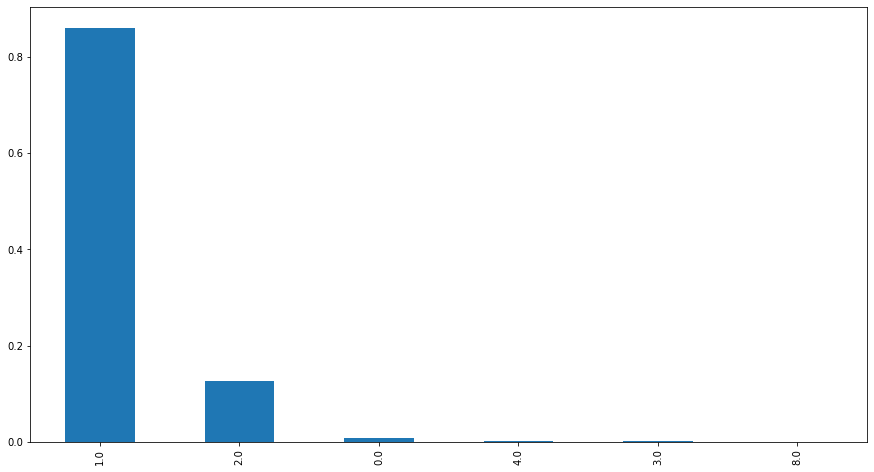

In [229]:
num_of_engines_percent.plot(kind='bar',figsize=(15, 8));

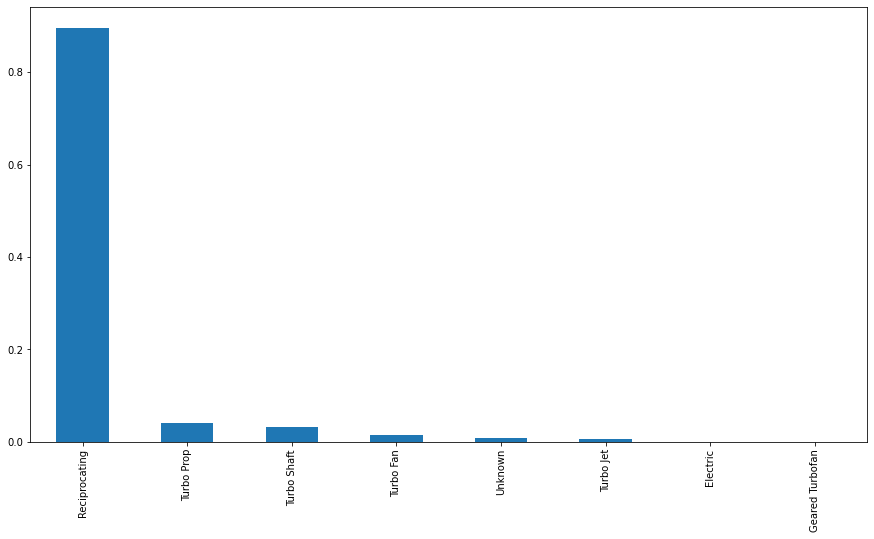

In [230]:
type_of_engines_percent.plot(kind='bar',figsize=(15, 8));

In [151]:
make = df_clean['Make'].value_counts()
make

Cessna                25105
Piper                 13760
Beech                  4758
Bell                   1637
Mooney                 1232
                      ...  
Sherman John, H           1
Ultralite Sro             1
Rowe Dennis A             1
Breezer Aircraft          1
Piper Cub Crafters        1
Name: Make, Length: 1269, dtype: int64

In [152]:
make_over_200_flights = make[make >200]
make_over_200_flights

Cessna               25105
Piper                13760
Beech                 4758
Bell                  1637
Mooney                1232
Grumman               1120
Bellanca              1008
Boeing                 672
Hughes                 653
Air Tractor            627
Aeronca                603
Robinson               594
Maule                  556
Champion               492
Stinson                422
Luscombe               395
Aero Commander         390
Taylorcraft            372
Schweizer              365
North American         351
De Havilland           331
Rockwell               327
Hiller                 275
Aerospatiale           243
Mcdonnell Douglas      230
Grumman American       221
Ayres                  210
Enstrom                206
Name: Make, dtype: int64

In [153]:
top_brands = make_over_200_flights.index
top_brands

Index(['Cessna', 'Piper', 'Beech', 'Bell', 'Mooney', 'Grumman', 'Bellanca',
       'Boeing', 'Hughes', 'Air Tractor', 'Aeronca', 'Robinson', 'Maule',
       'Champion', 'Stinson', 'Luscombe', 'Aero Commander', 'Taylorcraft',
       'Schweizer', 'North American', 'De Havilland', 'Rockwell', 'Hiller',
       'Aerospatiale', 'Mcdonnell Douglas', 'Grumman American', 'Ayres',
       'Enstrom'],
      dtype='object')

In [154]:
df_200_flights = df_clean[df_clean['Make'].isin(top_brands)]

In [234]:
fatal_rate_200_flights = df_200_flights.groupby('Make')['Injury.Severity'].value_counts(normalize= True).unstack('Injury.Severity').sort_values('Fatal')
fatal_rate_200_flights

Injury.Severity,Fatal,Non-Fatal,Unavailable
Make,,,
Hiller,0.061818,0.938182,NaN
Schweizer,0.082192,0.915068,0.002740
Stinson,0.087678,0.912322,NaN
Grumman,0.102679,0.897321,NaN
Boeing,0.102679,0.886905,0.010417
Maule,0.106115,0.893885,NaN
Enstrom,0.106796,0.893204,NaN
Luscombe,0.113924,0.886076,NaN
Aeronca,0.119403,0.878939,0.001658


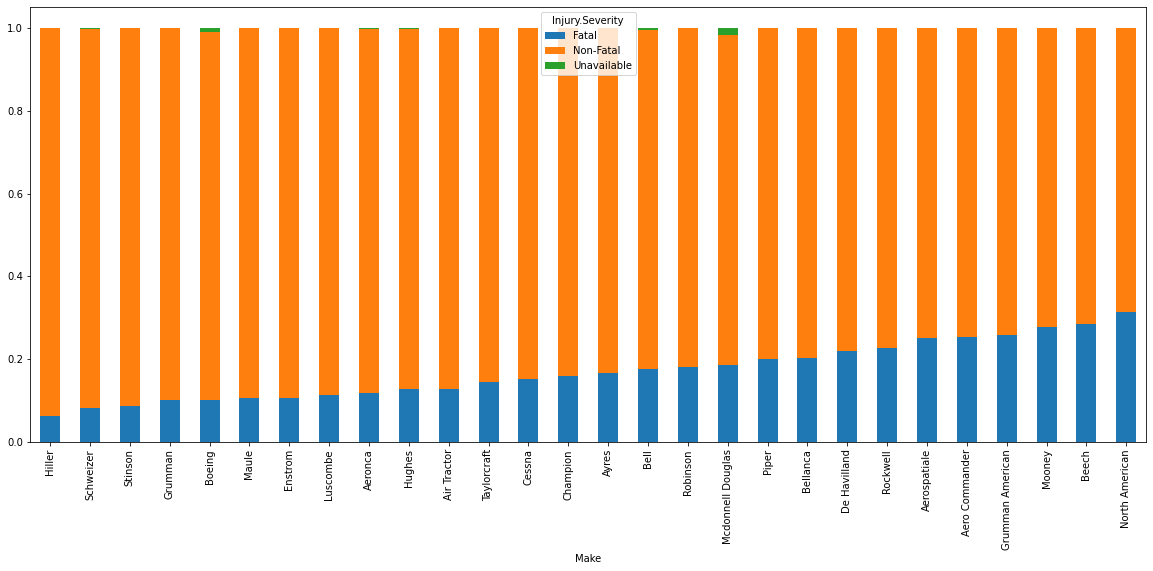

In [184]:
fatal_rate_200_flights.plot.bar(stacked = True, figsize = (20, 8));

In [185]:
phase_of_flight_percent = df_clean['Broad.phase.of.flight'].value_counts(normalize = True)
phase_of_flight_percent

Unknown        0.215669
Landing        0.206966
Takeoff        0.158793
Cruise         0.131966
Maneuvering    0.103170
Approach       0.081611
Taxi           0.024949
Climb          0.024033
Descent        0.022582
Go-around      0.019116
Standing       0.009863
Other          0.001283
Name: Broad.phase.of.flight, dtype: float64

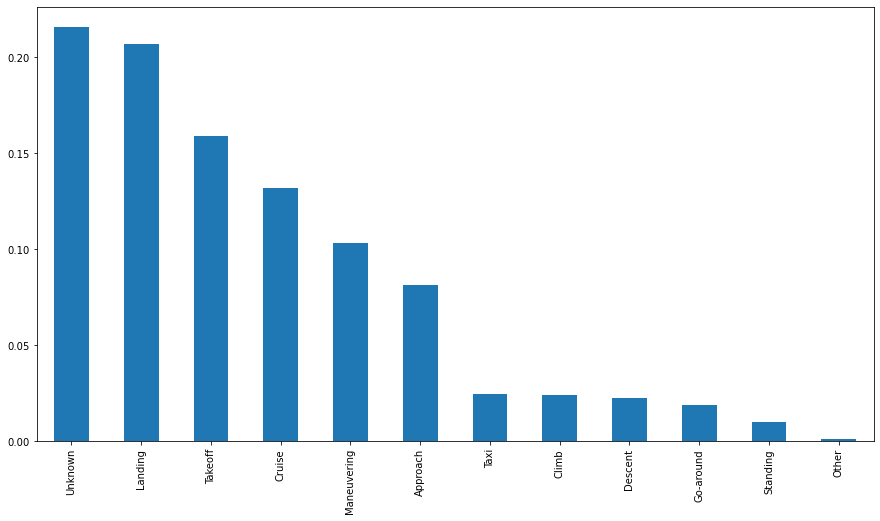

In [186]:
phase_of_flight_percent.plot(kind='bar', stacked=True,figsize=(15, 8));

In [200]:
total_flights_per_brand = df_200_flights.groupby('Make')['Event.Id'].count()
total_flights_per_brand

Make
Aero Commander         390
Aeronca                603
Aerospatiale           243
Air Tractor            627
Ayres                  210
Beech                 4758
Bell                  1637
Bellanca              1008
Boeing                 672
Cessna               25105
Champion               492
De Havilland           331
Enstrom                206
Grumman               1120
Grumman American       221
Hiller                 275
Hughes                 653
Luscombe               395
Maule                  556
Mcdonnell Douglas      230
Mooney                1232
North American         351
Piper                13760
Robinson               594
Rockwell               327
Schweizer              365
Stinson                422
Taylorcraft            372
Name: Event.Id, dtype: int64

In [193]:
total_deaths_by_brand = df_200_flights.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values()
total_deaths_by_brand

Make
Hiller                 22.0
Enstrom                31.0
Schweizer              35.0
Ayres                  37.0
Luscombe               66.0
Stinson                69.0
Taylorcraft            75.0
Air Tractor            85.0
Maule                  97.0
Aeronca               107.0
Grumman American      109.0
Champion              116.0
Hughes                123.0
Aerospatiale          152.0
North American        165.0
Robinson              173.0
Rockwell              183.0
Aero Commander        187.0
Grumman               209.0
De Havilland          253.0
Bellanca              334.0
Bell                  582.0
Mooney                626.0
Mcdonnell Douglas     630.0
Boeing               2047.0
Beech                3065.0
Piper                5664.0
Cessna               7493.0
Name: Total.Fatal.Injuries, dtype: float64

In [212]:
deaths_per_flight = (total_deaths_by_brand/total_flights_per_brand).sort_values()
deaths_per_flight

Make
Hiller               0.080000
Schweizer            0.095890
Air Tractor          0.135566
Enstrom              0.150485
Stinson              0.163507
Luscombe             0.167089
Maule                0.174460
Ayres                0.176190
Aeronca              0.177446
Grumman              0.186607
Hughes               0.188361
Taylorcraft          0.201613
Champion             0.235772
Robinson             0.291246
Cessna               0.298466
Bellanca             0.331349
Bell                 0.355528
Piper                0.411628
North American       0.470085
Aero Commander       0.479487
Grumman American     0.493213
Mooney               0.508117
Rockwell             0.559633
Aerospatiale         0.625514
Beech                0.644178
De Havilland         0.764350
Mcdonnell Douglas    2.739130
Boeing               3.046131
dtype: float64

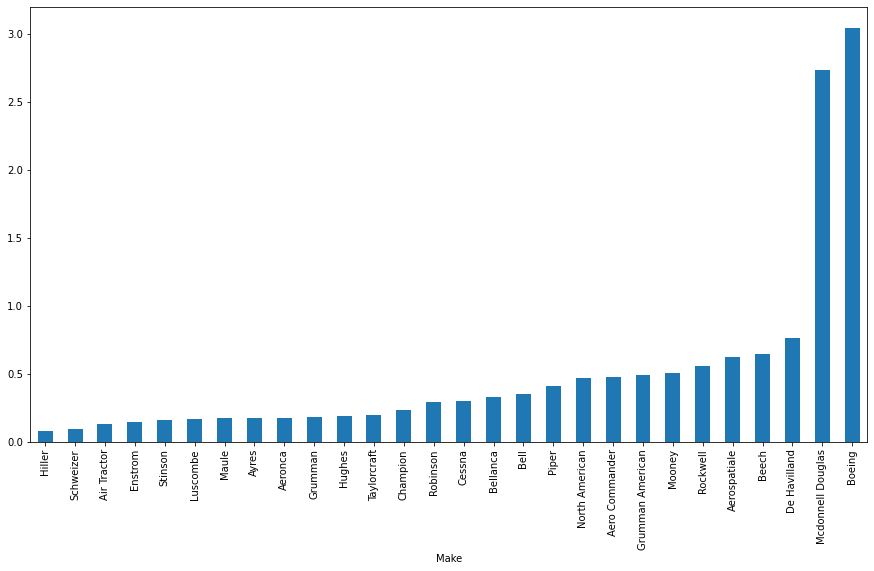

In [213]:
deaths_per_flight.plot(kind='bar', figsize=(15, 8));

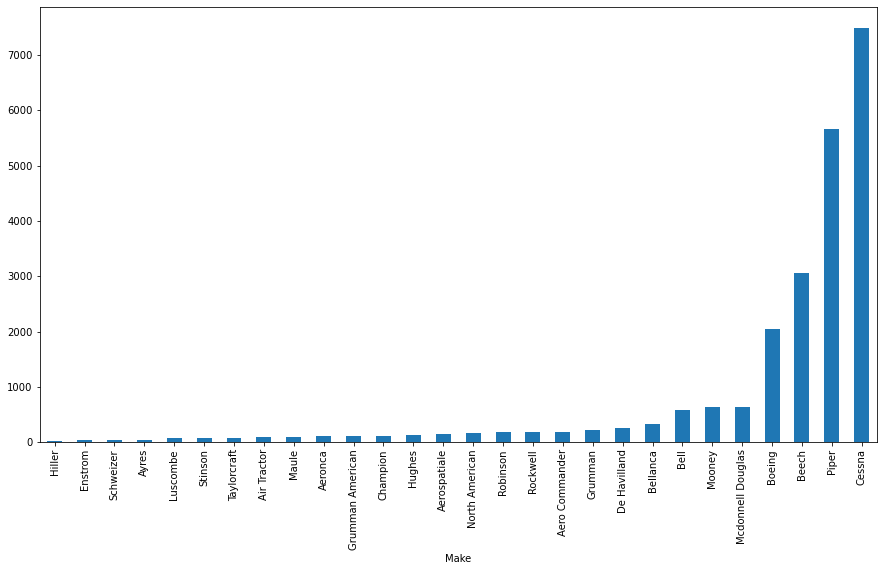

In [210]:
total_deaths_by_brand.plot(kind='bar', figsize=(15, 8));

In [260]:
# Creates lists of the top 10 brands based on: nonfatal rates, least number of deaths, and lowest death rate
top_10_nonfatal_rates = fatal_rate_200_flights[:10]
top_10_least_deaths = total_deaths_by_brand[:10]
lowest_10_deaths_per_flight = deaths_per_flight[:10]

In [262]:
# Returns a list of the brands that are in each of the three lists: 
# top_10_nonfatal_rates, top_10_least_deaths, lowest_10_deaths_per_flight

list(top_15_fatal_rates.index & top_15_least_deaths.index & lowest_15_deaths_per_flight.index)

['Hiller',
 'Schweizer',
 'Stinson',
 'Maule',
 'Enstrom',
 'Luscombe',
 'Aeronca',
 'Air Tractor',
 'Ayres']

# Conclusions

## Limitations

## Recommendations

This analysis leads to three recommendations for choosing the safest aircrafts:

* Invest in aircraft that have more than two engines and are not classified as a reciprocating engine.
     * Aircraft with reciprocating engines are prone to more accidents (~90%). Similarly, aircraft with one or two engines were involved in ~98% of reported accidents.
    
* Focus training of pilots on the Takeoff and Landing phases. 
     * While there are many phases that pilots must master, accidents during the Takeoff and Landing phases account  for almost one-third of all accidents (~31%).
    
* Select aircraft made by one of the following companies: Hiller, Schweizer, Stinson, Maule, Enstrom, Luscombe, Aeronca, Air Tractor, Ayres.
     * Planes made by these aircraft manufacturers were found to hold the least amount of risk based on a combination of their non-fatal rate, deathes per flight, and overal number of deaths.

## Next Steps